In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
import scipy
from skbio.stats.distance import mantel

In [2]:
# Load alpha diversity data
eveness = pd.read_csv('../../Input/OTU_evenness_vector.tsv', sep='\t', index_col=0)
eveness = eveness.rename(columns={"pielou_e": "Eveness"})

faith_pd = pd.read_csv('../../Input/OTU_faith_pd_vector.tsv', sep='\t', index_col=0)
faith_pd = faith_pd.rename(columns={"faith_pd": "PD"})

richness = pd.read_csv('../../Input/OTU_observed_otus_vector.tsv', sep='\t', index_col=0)
richness = richness.rename(columns={"observed_otus": "Richness"})

shannon = pd.read_csv('../../Input/OTU_shannon_vector.tsv', sep='\t', index_col=0)
shannon = shannon.rename(columns={"shannon": "Shannon"})

In [3]:
# Function to melt the distance matrix

def melt_distance_matrix(df_distance, distance_name):
    dist_melted = df_distance.where(np.triu(np.ones(df_distance.shape)).astype(bool)) # get upper triangle distance
    dist_melted = dist_melted.melt(ignore_index=False).dropna()
    dist_melted.index.name = 'Sample i'
    dist_melted.columns = ['Sample j', distance_name]
    dist_melted = dist_melted.reset_index()
    dist_melted = dist_melted[dist_melted[distance_name] != 0]

    return dist_melted

In [4]:
# Load beta diversity data

bray = pd.read_csv('../../Input/OTU_bray_curtis_distance_matrix.tsv', sep='\t', index_col=0)
bray_melted = melt_distance_matrix(bray, 'Bray-Curtis')

jaccard = pd.read_csv('../../Input/OTU_jaccard_distance_matrix.tsv', sep='\t', index_col=0)
jaccard_melted = melt_distance_matrix(jaccard, 'Jaccard')

unweighted_u = pd.read_csv('../../Input/OTU_unweighted_unifrac_distance_matrix.tsv', sep='\t', index_col=0)
unweighted_u_melted = melt_distance_matrix(unweighted_u, 'Unweighted-unifrac')

weighted_u = pd.read_csv('../../Input/OTU_weighted_unifrac_distance_matrix.tsv', sep='\t', index_col=0)
weighted_u_melted = melt_distance_matrix(weighted_u, 'Weighted-unifrac')

# Distribution of alpha and beta diversity 

In [10]:
# Alpha diversity distribution

def alpha_div_hist(df, index):
    plt.rcParams["figure.figsize"] = (4, 4)
    g = sns.histplot(data=df, x=index, color="#BA4A00", kde=True)
    plt.xlabel("")
    plt.ylabel("Count", fontsize=12)
    plt.title(index, fontsize=12)
    plt.savefig("../output/" + index + "_hist.pdf", bbox_inches="tight", dpi=300)
    plt.show()

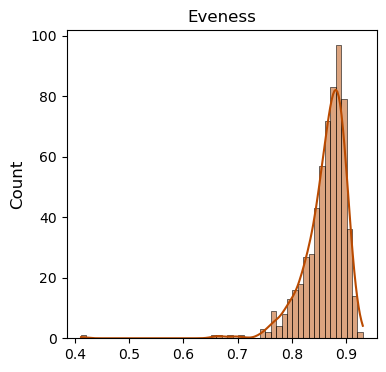

In [11]:
alpha_div_hist(eveness, 'Eveness')

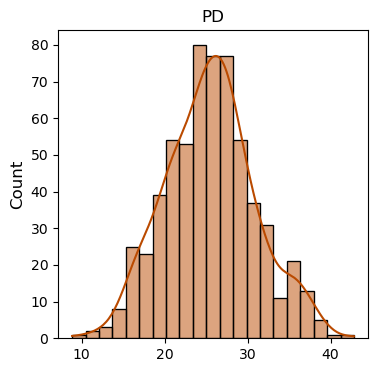

In [12]:
alpha_div_hist(faith_pd, 'PD')

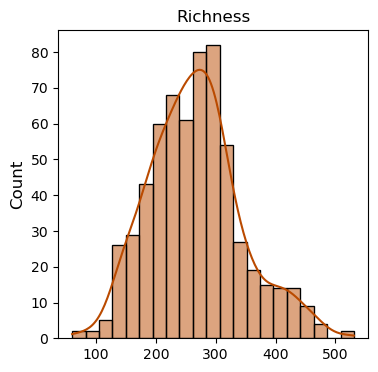

In [13]:
alpha_div_hist(richness, 'Richness')

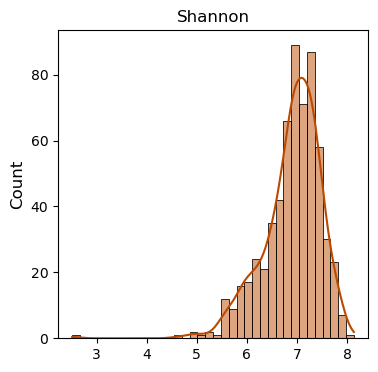

In [14]:
alpha_div_hist(shannon, 'Shannon')

In [15]:
# Beta diversity distribution

def beta_div_hist(df, index):
    plt.rcParams["figure.figsize"] = (4, 4)
    g = sns.histplot(data=df, x=index, color='#2E86C1', kde=True, bins=30)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=12)
    plt.title(index, fontsize=12)
    plt.savefig('../output/' + index + '_hist.pdf', bbox_inches='tight', dpi = 300)
    plt.show()

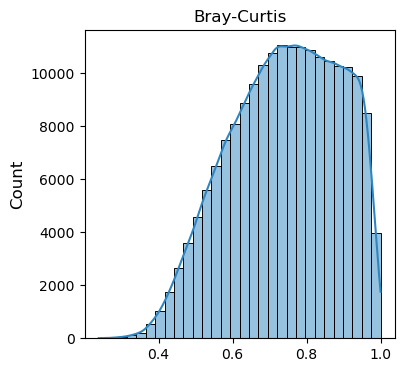

In [16]:
beta_div_hist(bray_melted, 'Bray-Curtis')

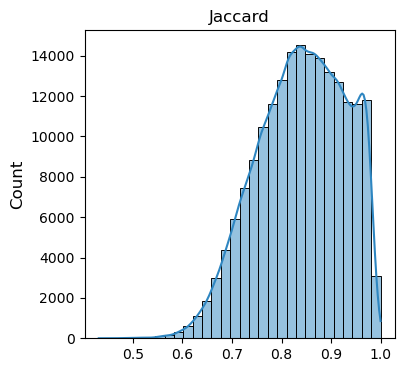

In [17]:
beta_div_hist(jaccard_melted, 'Jaccard')

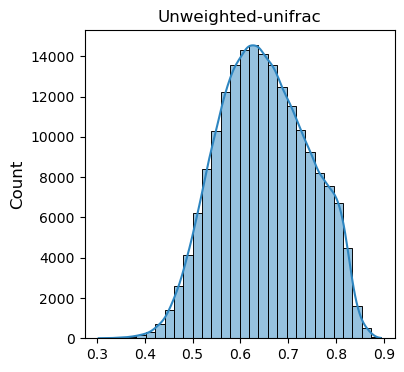

In [18]:
beta_div_hist(unweighted_u_melted, 'Unweighted-unifrac')

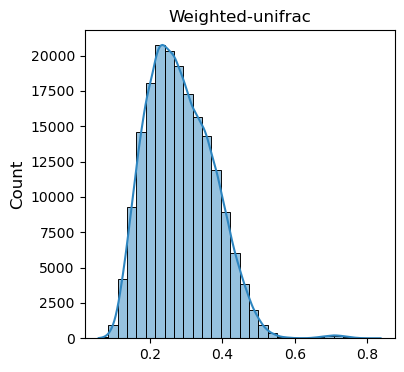

In [19]:
beta_div_hist(weighted_u_melted, 'Weighted-unifrac')

# Pairwise Spearman correlations between alpha diversity indice

In [20]:
comb_alpha = pd.concat([eveness, faith_pd, richness, shannon], axis=1)

# Compute the correlation matrix
corr= comb_alpha.corr(method = 'spearman')

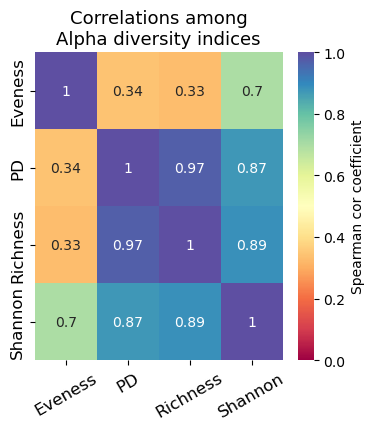

In [21]:
# # Set up the matplotlib figure

plt.rcParams["figure.figsize"] = (4, 4)

sns.heatmap(corr, annot=True, vmin=0, vmax=1, cmap='Spectral', cbar_kws={'label': 'Spearman cor coefficient'})

plt.xticks(fontsize=12, rotation=30, ha='center')
plt.yticks(fontsize=12)
plt.title("Correlations among\nAlpha diversity indices", fontsize=13)
plt.savefig('../output/alpha_div_cor.pdf', bbox_inches='tight', dpi = 300)
plt.show()

# Pairwise Mantel correlations between beta diversity matrices

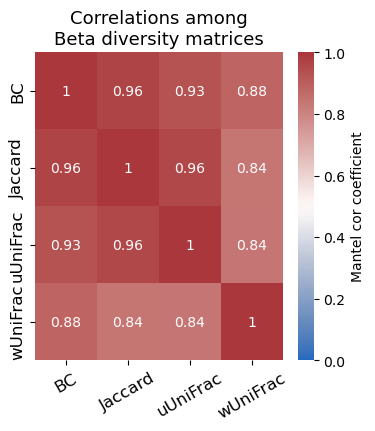

In [5]:
matrices = [bray, jaccard, unweighted_u, weighted_u]

# Calculate Mantel correlations between each pair of matrices
n = len(matrices)
mantel_corr = np.zeros((n, n))

for i in range(n):
    for j in range(i, n):
        r, p_value, _ = mantel(matrices[i], matrices[j], method='pearson', permutations=999)
        mantel_corr[i, j] = r
        mantel_corr[j, i] = r

# Create a heatmap to visualize the Mantel correlations
plt.figure(figsize=(4, 4))
sns.heatmap(mantel_corr, annot=True, cmap='vlag',
            xticklabels=['BC', 'Jaccard', 'uUniFrac', 'wUniFrac'],
            yticklabels=['BC', 'Jaccard', 'uUniFrac', 'wUniFrac'],
            vmin=0, vmax=1, cbar_kws={'label': 'Mantel cor coefficient'})

plt.xticks(fontsize=12, rotation=30, ha='center')
plt.yticks(fontsize=12)
plt.title("Correlations among\nBeta diversity matrices", fontsize=13)
plt.savefig('../output/beta_div_cor.pdf', bbox_inches='tight', dpi = 300)
plt.show()

### Phylum composition

Obtained from Qiime2

### Phylogenetic tree

Used the alignment of the full sequence of the 16s gene and constructed the phylogenetic tree using iqtree.